In [1]:
#####################################################################
# Modules

from ReadStats import Statistics, Conditional_Stats
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib.lines as mlines
from matplotlib import rc

rc('text', usetex=True)
rc('text.latex', preamble=r"\usepackage{fourier}")
rc('font', family='serif')
rc('font', size=24)
rc('axes', linewidth=1.5)
rc('axes', labelsize=24)
rc('lines', linewidth=2)

#opath = '/scratch/local1/m300551/ForKatherine/plots/3D/Re025/Rapids/'
opath = '/Volumes/Seagate/SCRATCH/plots/3D/Re025/Rapids/'

In [2]:
#######################################################################
# Constants

nu = 1./15000.
B0 = 0.005
N = np.sqrt(3)
L0 = (B0/N**3)**0.5

#######################################################################
# Calculate a running mean of a time series with a specified window size.
# Window size is number of entries on either side of the entry being averaged.
# Leaves out entries at the beginning and end of the time series such that the
# window size is always the same, but the resulting time series is shorter than
# the original.

def runningmean(timeseries,window):
    nt = len(timeseries)
    outseries = np.zeros(nt-(window*2))
    for n in range(window,nt-window):
        outseries[n-window] = np.mean(timeseries[n-window:n+window+1])
    return outseries

In [3]:
#######################################################################
# Stats

path_S0 = '/Volumes/Seagate/SCRATCH/qCBL_3D/Re025/1280x512x1280-S00/'
path_S05 = '/Volumes/Seagate/SCRATCH/qCBL_3D/Re025/1280x512x1280-S05/'
path_S10 = '/Volumes/Seagate/SCRATCH/qCBL_3D/Re025/1280x512x1280-S10/'
path_S15 = '/Volumes/Seagate/SCRATCH/qCBL_3D/Re025/1536x576x1536-S15/'
path_S20_1 = '/Volumes/Seagate/SCRATCH/qCBL_3D/Re025/S20-1536x576x1536/'
path_S20_2 = '/Volumes/Seagate/SCRATCH/qCBL_3D/Re025/S20-1536x576x2304/'
path_S25 = '/Volumes/Seagate/SCRATCH/qCBL_3D/Re025/2560x896x2560-S25/'

# Threshold based on mean of PDF

path_vort_S0 = 'stats/gate-vorticity/gate-1-37/'
path_vort_S05 = 'stats/gate-vorticity/gate-1-6/'
path_vort_S10 = 'stats/gate-vorticity/gate-1-34/'
path_vort_S15 = 'stats/gate-vorticity/gate-1-08/'
path_vort_S20 = 'stats/gate-vorticity/gate-1-01/'
path_vort_S25 = 'stats/gate-vorticity/gate-1-03/'

# Threshold based on max jump in PDF

#path_vort_S0 = 'stats/gate-vorticity/gate-1-67/'
#path_vort_S05 = 'stats/gate-vorticity/gate-1-64/'
#path_vort_S10 = 'stats/gate-vorticity/gate-1-26/'
#path_vort_S15 = 'stats/gate-vorticity/gate-0-97/'
#path_vort_S20 = 'stats/gate-vorticity/gate-1-1/'
#path_vort_S25 = 'stats/gate-vorticity/gate-1-116/'

In [4]:
# Conventional

S0 = Statistics(path_S0+'stats/pdftimes/avg2000-54000.nc') 
#S05 = Statistics(path_S05+'stats/selecttimes/avg1000-66000.nc')
S05 = Statistics(path_S05+'stats/pdftimes/avg2000-66000.nc')
S10 = Statistics(path_S10+'stats/pdftimes/avg13000-84000.nc')
S15 = Statistics(path_S15+'stats/pdftimes/avg15000-92000.nc')
S20_1 = Statistics(path_S20_1+'stats/pdftimes/avg17000-35000.nc')
S20_2 = Statistics(path_S20_2+'stats/pdftimes/avg39000-91000.nc')
S25 = Statistics(path_S25+'stats/pdftimes/avg28000-128000.nc')

S0_s1_var_zif = [S0.r2S[n,S0.z_if_arg[n]] for n in range(0,S0.t_len)]
S0_w_var_zif = [S0.Ryy[n,S0.z_if_arg[n]] for n in range(0,S0.t_len)]
S0_s1_flux_zif = [S0.Rsv[n,S0.z_if_arg[n]] for n in range(0,S0.t_len)]
S0_Pixx_zif = [S0.Pixx[n,S0.z_if_arg[n]] for n in range(0,S0.t_len)]
S0_Piyy_zif = [S0.Piyy[n,S0.z_if_arg[n]] for n in range(0,S0.t_len)]
S0_Prd_zif = [S0.Prd[n,S0.z_if_arg[n]] for n in range(0,S0.t_len)]

S05_s1_var_zif = [S05.r2S[n,S05.z_if_arg[n]] for n in range(0,S05.t_len)]
S05_w_var_zif = [S05.Ryy[n,S05.z_if_arg[n]] for n in range(0,S05.t_len)]
S05_s1_flux_zif = [S05.Rsv[n,S05.z_if_arg[n]] for n in range(0,S05.t_len)]
S05_Pixx_zif = [S05.Pixx[n,S05.z_if_arg[n]] for n in range(0,S05.t_len)]
S05_Piyy_zif = [S05.Piyy[n,S05.z_if_arg[n]] for n in range(0,S05.t_len)]
S05_Prd_zif = [S05.Prd[n,S05.z_if_arg[n]] for n in range(0,S05.t_len)]

S10_s1_var_zif = [S10.r2S[n,S10.z_if_arg[n]] for n in range(0,S10.t_len)]
S10_w_var_zif = [S10.Ryy[n,S10.z_if_arg[n]] for n in range(0,S10.t_len)]
S10_s1_flux_zif = [S10.Rsv[n,S10.z_if_arg[n]] for n in range(0,S10.t_len)]
S10_Pixx_zif = [S10.Pixx[n,S10.z_if_arg[n]] for n in range(0,S10.t_len)]
S10_Piyy_zif = [S10.Piyy[n,S10.z_if_arg[n]] for n in range(0,S10.t_len)]
S10_Prd_zif = [S10.Prd[n,S10.z_if_arg[n]] for n in range(0,S10.t_len)]

S15_s1_var_zif = [S15.r2S[n,S15.z_if_arg[n]] for n in range(0,S15.t_len)]
S15_w_var_zif = [S15.Ryy[n,S15.z_if_arg[n]] for n in range(0,S15.t_len)]
S15_s1_flux_zif = [S15.Rsv[n,S15.z_if_arg[n]] for n in range(0,S15.t_len)]
S15_Pixx_zif = [S15.Pixx[n,S15.z_if_arg[n]] for n in range(0,S15.t_len)]
S15_Piyy_zif = [S15.Piyy[n,S15.z_if_arg[n]] for n in range(0,S15.t_len)]
S15_Prd_zif = [S15.Prd[n,S15.z_if_arg[n]] for n in range(0,S15.t_len)]

S20_s1_var_zif_1 = [S20_1.r2S[n,S20_1.z_if_arg[n]] for n in range(0,S20_1.t_len)]
S20_s1_var_zif_2 = [S20_2.r2S[n,S20_2.z_if_arg[n]] for n in range(0,S20_2.t_len)]
S20_s1_var_zif = S20_s1_var_zif_1 + S20_s1_var_zif_2

S20_w_var_zif_1 = [S20_1.Ryy[n,S20_1.z_if_arg[n]] for n in range(0,S20_1.t_len)]
S20_w_var_zif_2 = [S20_2.Ryy[n,S20_2.z_if_arg[n]] for n in range(0,S20_2.t_len)]
S20_w_var_zif = S20_w_var_zif_1 + S20_w_var_zif_2

S20_s1_flux_zif_1 = [S20_1.Rsv[n,S20_1.z_if_arg[n]] for n in range(0,S20_1.t_len)]
S20_s1_flux_zif_2 = [S20_2.Rsv[n,S20_2.z_if_arg[n]] for n in range(0,S20_2.t_len)]
S20_s1_flux_zif = S20_s1_flux_zif_1 + S20_s1_flux_zif_2

S20_Pixx_zif_1 = [S20_1.Pixx[n,S20_1.z_if_arg[n]] for n in range(0,S20_1.t_len)]
S20_Pixx_zif_2 = [S20_2.Pixx[n,S20_2.z_if_arg[n]] for n in range(0,S20_2.t_len)]
S20_Pixx_zif = S20_Pixx_zif_1 + S20_Pixx_zif_2

S20_Piyy_zif_1 = [S20_1.Piyy[n,S20_1.z_if_arg[n]] for n in range(0,S20_1.t_len)]
S20_Piyy_zif_2 = [S20_2.Piyy[n,S20_2.z_if_arg[n]] for n in range(0,S20_2.t_len)]
S20_Piyy_zif = S20_Piyy_zif_1 + S20_Piyy_zif_2

S20_Prd_zif_1 = [S20_1.Prd[n,S20_1.z_if_arg[n]] for n in range(0,S20_1.t_len)]
S20_Prd_zif_2 = [S20_2.Prd[n,S20_2.z_if_arg[n]] for n in range(0,S20_2.t_len)]
S20_Prd_zif = S20_Prd_zif_1 + S20_Prd_zif_2

S25_s1_var_zif = [S25.r2S[n,S25.z_if_arg[n]] for n in range(0,S25.t_len)]
S25_w_var_zif = [S25.Ryy[n,S25.z_if_arg[n]] for n in range(0,S25.t_len)]
S25_s1_flux_zif = [S25.Rsv[n,S25.z_if_arg[n]] for n in range(0,S25.t_len)]
S25_Pixx_zif = [S25.Pixx[n,S25.z_if_arg[n]] for n in range(0,S25.t_len)]
S25_Piyy_zif = [S25.Piyy[n,S25.z_if_arg[n]] for n in range(0,S25.t_len)]
S25_Prd_zif = [S25.Prd[n,S25.z_if_arg[n]] for n in range(0,S25.t_len)]

In [5]:
## Conditional ##

S0_vort_int = Conditional_Stats(path_S0+path_vort_S0+'int2000-54000.nc',path_S0+path_vort_S0+'Partition1/cavg2000-54000.nc',path_S0+path_vort_S0+'Partition2/cavg2000-54000.nc')
S05_vort_int = Conditional_Stats(path_S05+path_vort_S05+'int2000-66000.nc',path_S05+path_vort_S05+'Partition1/cavg2000-66000.nc',path_S05+path_vort_S05+'Partition2/cavg2000-66000.nc')
S10_vort_int = Conditional_Stats(path_S10+path_vort_S10+'int14000-84000.nc',path_S10+path_vort_S10+'Partition1/cavg14000-84000.nc',path_S10+path_vort_S10+'Partition2/cavg14000-84000.nc')
S15_vort_int = Conditional_Stats(path_S15+path_vort_S15+'int16000-92000.nc',path_S15+path_vort_S15+'Partition1/cavg16000-92000.nc',path_S15+path_vort_S15+'Partition2/cavg16000-92000.nc')
S20_vort_int_1 = Conditional_Stats(path_S20_1+path_vort_S20+'int18000-34000.nc',path_S20_1+path_vort_S20+'Partition1/cavg18000-34000.nc',path_S20_1+path_vort_S20+'Partition2/cavg18000-34000.nc')
S20_vort_int_2 = Conditional_Stats(path_S20_2+path_vort_S20+'int40000-92000.nc',path_S20_2+path_vort_S20+'Partition1/cavg40000-92000.nc',path_S20_2+path_vort_S20+'Partition2/cavg40000-92000.nc')
S25_vort_int = Conditional_Stats(path_S25+path_vort_S25+'int28000-128000.nc',path_S25+path_vort_S25+'Partition1/cavg28000-128000.nc',path_S25+path_vort_S25+'Partition2/cavg28000-128000.nc')

In [6]:
# Turbulent area fraction #

S0_vort_turbareafrac_zif = [S0_vort_int.int2[n,S0.z_if_arg[n]] for n in range(0,S0.t_len)]
S05_vort_turbareafrac_zif = [S05_vort_int.int2[n,S05.z_if_arg[n]] for n in range(0,S05.t_len)]
S10_vort_turbareafrac_zif = [S10_vort_int.int2[n,S10.z_if_arg[n]] for n in range(0,S10.t_len)]
S15_vort_turbareafrac_zif = [S15_vort_int.int2[n,S15.z_if_arg[n]] for n in range(0,S15.t_len)]
S20_vort_turbareafrac_zif_1 = [S20_vort_int_1.int2[n,S20_1.z_if_arg[n]] for n in range(0,S20_1.t_len)]
S20_vort_turbareafrac_zif_2 = [S20_vort_int_2.int2[n,S20_2.z_if_arg[n]] for n in range(0,S20_2.t_len)]
S20_vort_turbareafrac_zif = S20_vort_turbareafrac_zif_1 + S20_vort_turbareafrac_zif_2
S25_vort_turbareafrac_zif = [S25_vort_int.int2[n,S25.z_if_arg[n]] for n in range(0,S25.t_len)]

In [7]:
# Non-turbulent

S0_vort_p1_s1_mean_zif = [S0_vort_int.P1S1Mom1[n,S0.z_if_arg[n]] for n in range(0,S0.t_len)]
S0_vort_p1_w_mean_zif = [S0_vort_int.P1VMom1[n,S0.z_if_arg[n]] for n in range(0,S0.t_len)]
S0_vort_p1_s1_var_zif = [S0_vort_int.P1S1Mom2[n,S0.z_if_arg[n]] for n in range(0,S0.t_len)]
S0_vort_p1_w_var_zif = [S0_vort_int.P1VMom2[n,S0.z_if_arg[n]] for n in range(0,S0.t_len)]
S0_vort_p1_v1_zif = [S0_vort_int.P1v1[n,S0.z_if_arg[n]] for n in range(0,S0.t_len)]

S05_vort_p1_s1_mean_zif = [S05_vort_int.P1S1Mom1[n,S05.z_if_arg[n]] for n in range(0,S05.t_len)]
S05_vort_p1_w_mean_zif = [S05_vort_int.P1VMom1[n,S05.z_if_arg[n]] for n in range(0,S05.t_len)]
S05_vort_p1_s1_var_zif = [S05_vort_int.P1S1Mom2[n,S05.z_if_arg[n]] for n in range(0,S05.t_len)]
S05_vort_p1_w_var_zif = [S05_vort_int.P1VMom2[n,S05.z_if_arg[n]] for n in range(0,S05.t_len)]
S05_vort_p1_v1_zif = [S05_vort_int.P1v1[n,S05.z_if_arg[n]] for n in range(0,S05.t_len)]

S10_vort_p1_s1_mean_zif = [S10_vort_int.P1S1Mom1[n,S10.z_if_arg[n]] for n in range(0,S10.t_len)]
S10_vort_p1_w_mean_zif = [S10_vort_int.P1VMom1[n,S10.z_if_arg[n]] for n in range(0,S10.t_len)]
S10_vort_p1_s1_var_zif = [S10_vort_int.P1S1Mom2[n,S10.z_if_arg[n]] for n in range(0,S10.t_len)]
S10_vort_p1_w_var_zif = [S10_vort_int.P1VMom2[n,S10.z_if_arg[n]] for n in range(0,S10.t_len)]
S10_vort_p1_v1_zif = [S10_vort_int.P1v1[n,S10.z_if_arg[n]] for n in range(0,S10.t_len)]

S15_vort_p1_s1_mean_zif = [S15_vort_int.P1S1Mom1[n,S15.z_if_arg[n]] for n in range(0,S15.t_len)]
S15_vort_p1_w_mean_zif = [S15_vort_int.P1VMom1[n,S15.z_if_arg[n]] for n in range(0,S15.t_len)]
S15_vort_p1_s1_var_zif = [S15_vort_int.P1S1Mom2[n,S15.z_if_arg[n]] for n in range(0,S15.t_len)]
S15_vort_p1_w_var_zif = [S15_vort_int.P1VMom2[n,S15.z_if_arg[n]] for n in range(0,S15.t_len)]
S15_vort_p1_v1_zif = [S15_vort_int.P1v1[n,S15.z_if_arg[n]] for n in range(0,S15.t_len)]

S20_vort_p1_s1_mean_zif_1 = [S20_vort_int_1.P1S1Mom1[n,S20_1.z_if_arg[n]] for n in range(0,S20_1.t_len)]
S20_vort_p1_s1_mean_zif_2 = [S20_vort_int_2.P1S1Mom1[n,S20_2.z_if_arg[n]] for n in range(0,S20_2.t_len)]
S20_vort_p1_s1_mean_zif = S20_vort_p1_s1_mean_zif_1 + S20_vort_p1_s1_mean_zif_2

S20_vort_p1_w_mean_zif_1 = [S20_vort_int_1.P1VMom1[n,S20_1.z_if_arg[n]] for n in range(0,S20_1.t_len)]
S20_vort_p1_w_mean_zif_2 = [S20_vort_int_2.P1VMom1[n,S20_2.z_if_arg[n]] for n in range(0,S20_2.t_len)]
S20_vort_p1_w_mean_zif = S20_vort_p1_w_mean_zif_1 + S20_vort_p1_w_mean_zif_2

S20_vort_p1_s1_var_zif_1 = [S20_vort_int_1.P1S1Mom2[n,S20_1.z_if_arg[n]] for n in range(0,S20_1.t_len)]
S20_vort_p1_s1_var_zif_2 = [S20_vort_int_2.P1S1Mom2[n,S20_2.z_if_arg[n]] for n in range(0,S20_2.t_len)]
S20_vort_p1_s1_var_zif = S20_vort_p1_s1_var_zif_1 + S20_vort_p1_s1_var_zif_2

S20_vort_p1_w_var_zif_1 = [S20_vort_int_1.P1VMom2[n,S20_1.z_if_arg[n]] for n in range(0,S20_1.t_len)]
S20_vort_p1_w_var_zif_2 = [S20_vort_int_2.P1VMom2[n,S20_2.z_if_arg[n]] for n in range(0,S20_2.t_len)]
S20_vort_p1_w_var_zif = S20_vort_p1_w_var_zif_1 + S20_vort_p1_w_var_zif_2

S20_vort_p1_v1_zif_1 = [S20_vort_int_1.P1v1[n,S20_1.z_if_arg[n]] for n in range(0,S20_1.t_len)]
S20_vort_p1_v1_zif_2 = [S20_vort_int_2.P1v1[n,S20_2.z_if_arg[n]] for n in range(0,S20_2.t_len)]
S20_vort_p1_v1_zif = S20_vort_p1_v1_zif_1 + S20_vort_p1_v1_zif_2

S25_vort_p1_s1_mean_zif = [S25_vort_int.P1S1Mom1[n,S25.z_if_arg[n]] for n in range(0,S25.t_len)]
S25_vort_p1_w_mean_zif = [S25_vort_int.P1VMom1[n,S25.z_if_arg[n]] for n in range(0,S25.t_len)]
S25_vort_p1_s1_var_zif = [S25_vort_int.P1S1Mom2[n,S25.z_if_arg[n]] for n in range(0,S25.t_len)]
S25_vort_p1_w_var_zif = [S25_vort_int.P1VMom2[n,S25.z_if_arg[n]] for n in range(0,S25.t_len)]
S25_vort_p1_v1_zif = [S25_vort_int.P1v1[n,S25.z_if_arg[n]] for n in range(0,S25.t_len)]

In [8]:
# Turbulent

S0_vort_p2_s1_mean_zif = [S0_vort_int.P2S1Mom1[n,S0.z_if_arg[n]] for n in range(0,S0.t_len)]
S0_vort_p2_s2_mean_zif = [S0_vort_int.P2S2Mom1[n,S0.z_if_arg[n]] for n in range(0,S0.t_len)]
S0_vort_p2_w_mean_zif = [S0_vort_int.P2VMom1[n,S0.z_if_arg[n]] for n in range(0,S0.t_len)]
S0_vort_p2_s1_var_zif = [S0_vort_int.P2S1Mom2[n,S0.z_if_arg[n]] for n in range(0,S0.t_len)]
S0_vort_p2_s2_var_zif = [S0_vort_int.P2S2Mom2[n,S0.z_if_arg[n]] for n in range(0,S0.t_len)]
S0_vort_p2_w_var_zif = [S0_vort_int.P2VMom2[n,S0.z_if_arg[n]] for n in range(0,S0.t_len)]
S0_vort_p2_v1_zif = [S0_vort_int.P2v1[n,S0.z_if_arg[n]] for n in range(0,S0.t_len)]
S0_vort_p2_v2_zif = [S0_vort_int.P2v2[n,S0.z_if_arg[n]] for n in range(0,S0.t_len)]

S05_vort_p2_s1_mean_zif = [S05_vort_int.P2S1Mom1[n,S05.z_if_arg[n]] for n in range(0,S05.t_len)]
S05_vort_p2_w_mean_zif = [S05_vort_int.P2VMom1[n,S05.z_if_arg[n]] for n in range(0,S05.t_len)]
S05_vort_p2_s1_var_zif = [S05_vort_int.P2S1Mom2[n,S05.z_if_arg[n]] for n in range(0,S05.t_len)]
S05_vort_p2_w_var_zif = [S05_vort_int.P2VMom2[n,S05.z_if_arg[n]] for n in range(0,S05.t_len)]
S05_vort_p2_v1_zif = [S05_vort_int.P2v1[n,S05.z_if_arg[n]] for n in range(0,S05.t_len)]

S10_vort_p2_s1_mean_zif = [S10_vort_int.P2S1Mom1[n,S10.z_if_arg[n]] for n in range(0,S10.t_len)]
S10_vort_p2_w_mean_zif = [S10_vort_int.P2VMom1[n,S10.z_if_arg[n]] for n in range(0,S10.t_len)]
S10_vort_p2_s1_var_zif = [S10_vort_int.P2S1Mom2[n,S10.z_if_arg[n]] for n in range(0,S10.t_len)]
S10_vort_p2_w_var_zif = [S10_vort_int.P2VMom2[n,S10.z_if_arg[n]] for n in range(0,S10.t_len)]
S10_vort_p2_v1_zif = [S10_vort_int.P2v1[n,S10.z_if_arg[n]] for n in range(0,S10.t_len)]

S15_vort_p2_s1_mean_zif = [S15_vort_int.P2S1Mom1[n,S15.z_if_arg[n]] for n in range(0,S15.t_len)]
S15_vort_p2_w_mean_zif = [S15_vort_int.P2VMom1[n,S15.z_if_arg[n]] for n in range(0,S15.t_len)]
S15_vort_p2_s1_var_zif = [S15_vort_int.P2S1Mom2[n,S15.z_if_arg[n]] for n in range(0,S15.t_len)]
S15_vort_p2_w_var_zif = [S15_vort_int.P2VMom2[n,S15.z_if_arg[n]] for n in range(0,S15.t_len)]
S15_vort_p2_v1_zif = [S15_vort_int.P2v1[n,S15.z_if_arg[n]] for n in range(0,S15.t_len)]

S20_vort_p2_s1_mean_zif_1 = [S20_vort_int_1.P2S1Mom1[n,S20_1.z_if_arg[n]] for n in range(0,S20_1.t_len)]
S20_vort_p2_s1_mean_zif_2 = [S20_vort_int_2.P2S1Mom1[n,S20_2.z_if_arg[n]] for n in range(0,S20_2.t_len)]
S20_vort_p2_s1_mean_zif = S20_vort_p2_s1_mean_zif_1 + S20_vort_p2_s1_mean_zif_2

S20_vort_p2_w_mean_zif_1 = [S20_vort_int_1.P2VMom1[n,S20_1.z_if_arg[n]] for n in range(0,S20_1.t_len)]
S20_vort_p2_w_mean_zif_2 = [S20_vort_int_2.P2VMom1[n,S20_2.z_if_arg[n]] for n in range(0,S20_2.t_len)]
S20_vort_p2_w_mean_zif = S20_vort_p2_w_mean_zif_1 + S20_vort_p2_w_mean_zif_2

S20_vort_p2_s1_var_zif_1 = [S20_vort_int_1.P2S1Mom2[n,S20_1.z_if_arg[n]] for n in range(0,S20_1.t_len)]
S20_vort_p2_s1_var_zif_2 = [S20_vort_int_2.P2S1Mom2[n,S20_2.z_if_arg[n]] for n in range(0,S20_2.t_len)]
S20_vort_p2_s1_var_zif = S20_vort_p2_s1_var_zif_1 + S20_vort_p2_s1_var_zif_2

S20_vort_p2_w_var_zif_1 = [S20_vort_int_1.P2VMom2[n,S20_1.z_if_arg[n]] for n in range(0,S20_1.t_len)]
S20_vort_p2_w_var_zif_2 = [S20_vort_int_2.P2VMom2[n,S20_2.z_if_arg[n]] for n in range(0,S20_2.t_len)]
S20_vort_p2_w_var_zif = S20_vort_p2_w_var_zif_1 + S20_vort_p2_w_var_zif_2

S20_vort_p2_v1_zif_1 = [S20_vort_int_1.P2v1[n,S20_1.z_if_arg[n]] for n in range(0,S20_1.t_len)]
S20_vort_p2_v1_zif_2 = [S20_vort_int_2.P2v1[n,S20_2.z_if_arg[n]] for n in range(0,S20_2.t_len)]
S20_vort_p2_v1_zif = S20_vort_p2_v1_zif_1 + S20_vort_p2_v1_zif_2

S25_vort_p2_s1_mean_zif = [S25_vort_int.P2S1Mom1[n,S25.z_if_arg[n]] for n in range(0,S25.t_len)]
S25_vort_p2_w_mean_zif = [S25_vort_int.P2VMom1[n,S25.z_if_arg[n]] for n in range(0,S25.t_len)]
S25_vort_p2_s1_var_zif = [S25_vort_int.P2S1Mom2[n,S25.z_if_arg[n]] for n in range(0,S25.t_len)]
S25_vort_p2_w_var_zif = [S25_vort_int.P2VMom2[n,S25.z_if_arg[n]] for n in range(0,S25.t_len)]
S25_vort_p2_v1_zif = [S25_vort_int.P2v1[n,S25.z_if_arg[n]] for n in range(0,S25.t_len)]

In [9]:
# time

time_1 = [S20_1.z_enc[n]/L0 for n in range(0,S20_1.t_len)]
time_2 = [S20_2.z_enc[n]/L0 for n in range(0,S20_2.t_len)]

time = time_1 + time_2

# scales
z_if = np.concatenate([S20_1.z_if,S20_2.z_if])
z_is = np.concatenate([S20_1.z_is,S20_2.z_if])
z_ig = np.concatenate([S20_1.z_ig,S20_2.z_ig])
z_enc = np.concatenate([S20_1.z_enc,S20_2.z_enc])
w_enc = (B0*z_enc)**(1./3.)

Delta_U = np.concatenate([S20_1.DeltaU,S20_2.DeltaU])

In [10]:
# Correlations

rho_bw_S0 = S0.Rsv/(S0.r2S*S0.Ryy)**0.5
rho_bw_turb_S0 = (S0_vort_int.P2v1[7:10,:]-S0_vort_int.P2S1Mom1[7:10,:]*S0_vort_int.P2VMom1[7:10,:])/(S0_vort_int.P2S1Mom2[7:10,:]*S0_vort_int.P2VMom2[7:10,:])**0.5
rho_bw_S05 = S05.Rsv/(S05.r2S*S05.Ryy)**0.5
rho_bw_turb_S05 = (S05_vort_int.P2v1[9:12,:]-S05_vort_int.P2S1Mom1[9:12,:]*S05_vort_int.P2VMom1[9:12,:])/(S05_vort_int.P2S1Mom2[9:12,:]*S05_vort_int.P2VMom2[9:12,:])**0.5
rho_bw_S10 = S10.Rsv/(S10.r2S*S10.Ryy)**0.5
rho_bw_turb_S10 = (S10_vort_int.P2v1[4:7,:]-S10_vort_int.P2S1Mom1[4:7,:]*S10_vort_int.P2VMom1[4:7,:])/(S10_vort_int.P2S1Mom2[4:7,:]*S10_vort_int.P2VMom2[4:7,:])**0.5
rho_bw_S15 = S15.Rsv/(S15.r2S*S15.Ryy)**0.5
rho_bw_turb_S15 = (S15_vort_int.P2v1[4:7,:]-S15_vort_int.P2S1Mom1[4:7,:]*S15_vort_int.P2VMom1[4:7,:])/(S15_vort_int.P2S1Mom2[4:7,:]*S15_vort_int.P2VMom2[4:7,:])**0.5
rho_bw_S20 = S20_1.Rsv/(S20_1.r2S*S20_1.Ryy)**0.5
rho_bw_S20_turb = (S20_vort_int_1.P2v1[4:,:]-S20_vort_int_1.P2S1Mom1[4:,:]*S20_vort_int_1.P2VMom1[4:,:])/(S20_vort_int_1.P2S1Mom2[4:,:]*S20_vort_int_1.P2VMom2[4:,:])**0.5
rho_bw_S25 = S25.Rsv/(S25.r2S*S25.Ryy)**0.5
rho_bw_turb_S25 = (S25_vort_int.P2v1[4:7,:]-S25_vort_int.P2S1Mom1[4:7,:]*S25_vort_int.P2VMom1[4:7,:])/(S25_vort_int.P2S1Mom2[4:7,:]*S25_vort_int.P2VMom2[4:7,:])**0.5

rho_bw_zif_S0 = np.array(S0_s1_flux_zif)/(np.array(S0_s1_var_zif)*np.array(S0_w_var_zif))**0.5
rho_bw_zif_S0_turb =  (np.array(S0_vort_p2_v1_zif)-np.array(S0_vort_p2_s1_mean_zif)*np.array(S0_vort_p2_w_mean_zif))/(np.array(S0_vort_p2_s1_var_zif)*np.array(S0_vort_p2_w_var_zif))**0.5
rho_bw_zif_S05 = np.array(S05_s1_flux_zif)/(np.array(S05_s1_var_zif)*np.array(S05_w_var_zif))**0.5
rho_bw_zif_S05_turb =  (np.array(S05_vort_p2_v1_zif)-np.array(S05_vort_p2_s1_mean_zif)*np.array(S05_vort_p2_w_mean_zif))/(np.array(S05_vort_p2_s1_var_zif)*np.array(S05_vort_p2_w_var_zif))**0.5
rho_bw_zif_S10 = np.array(S10_s1_flux_zif)/(np.array(S10_s1_var_zif)*np.array(S10_w_var_zif))**0.5
rho_bw_zif_S10_turb =  (np.array(S10_vort_p2_v1_zif)-np.array(S10_vort_p2_s1_mean_zif)*np.array(S10_vort_p2_w_mean_zif))/(np.array(S10_vort_p2_s1_var_zif)*np.array(S10_vort_p2_w_var_zif))**0.5
rho_bw_zif_S15 = np.array(S15_s1_flux_zif)/(np.array(S15_s1_var_zif)*np.array(S15_w_var_zif))**0.5
rho_bw_zif_S15_turb =  (np.array(S15_vort_p2_v1_zif)-np.array(S15_vort_p2_s1_mean_zif)*np.array(S15_vort_p2_w_mean_zif))/(np.array(S15_vort_p2_s1_var_zif)*np.array(S15_vort_p2_w_var_zif))**0.5
rho_bw_zif_S20 = np.array(S20_s1_flux_zif)/(np.array(S20_s1_var_zif)*np.array(S20_w_var_zif))**0.5
rho_bw_zif_S20_turb = (np.array(S20_vort_p2_v1_zif)-np.array(S20_vort_p2_s1_mean_zif)*np.array(S20_vort_p2_w_mean_zif))/(np.array(S20_vort_p2_s1_var_zif)*np.array(S20_vort_p2_w_var_zif))**0.5
rho_bw_zif_S25 = np.array(S25_s1_flux_zif)/(np.array(S25_s1_var_zif)*np.array(S25_w_var_zif))**0.5
rho_bw_zif_S25_turb =  (np.array(S25_vort_p2_v1_zif)-np.array(S25_vort_p2_s1_mean_zif)*np.array(S25_vort_p2_w_mean_zif))/(np.array(S25_vort_p2_s1_var_zif)*np.array(S25_vort_p2_w_var_zif))**0.5

In [11]:
#######################################################################
# Plot

blues = matplotlib.cm.get_cmap('Blues')

colors = []
for value in [0.1,0.25,0.40,0.55,0.7,0.85]:
    colors.append(matplotlib.cm.get_cmap('plasma_r')(value))

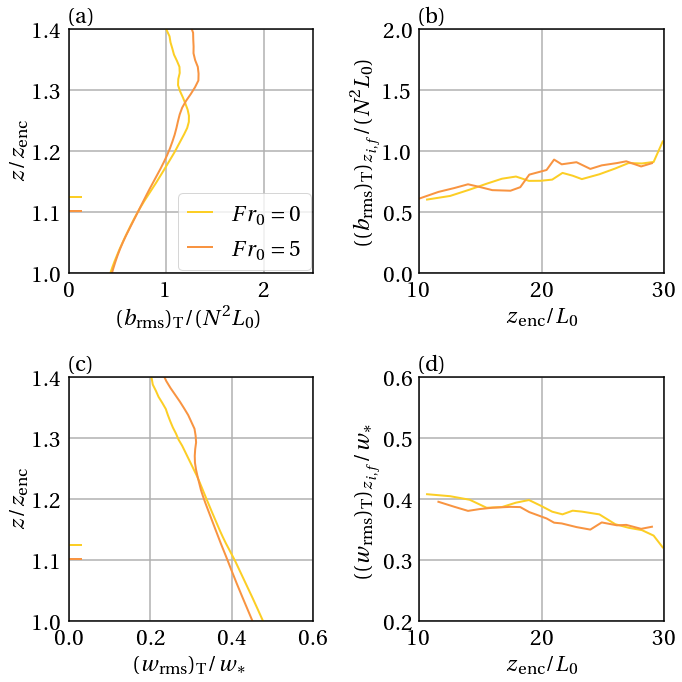

In [18]:
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,10))
ax1.grid(True,linewidth=1.5)
ax2.grid(True,linewidth=1.5)
ax3.grid(True,linewidth=1.5)
ax4.grid(True,linewidth=1.5)
ax1.tick_params(bottom=False,left=False)
ax2.tick_params(bottom=False,left=False)
ax3.tick_params(bottom=False,left=False)
ax4.tick_params(bottom=False,left=False)
ax1.set_xlim(0,2.5)
ax1.set_ylim(1,1.4)
ax2.set_xlim(10,30)
ax2.set_ylim(0,2)
ax3.set_ylim(1,1.4)
ax3.set_xlim(0,0.6)
ax4.set_ylim(0.2,0.6)
ax4.set_xlim(10,30)
ax1.plot(np.mean(np.sqrt(S0_vort_int.P2S1Mom2[4:7,:]),axis=0)/(N**2*L0),S0.y/np.mean(S0.z_enc[4:7]),c=colors[0],label=r'$Fr_0=0$')
ax1.plot(np.mean(np.sqrt(S05_vort_int.P2S1Mom2[4:7,:]),axis=0)/(N**2*L0),S05.y/np.mean(S05.z_enc[4:7],axis=0),c=colors[1],label=r'$Fr_0=5$')
ax2.plot(S0.z_enc[1:-1]/L0,runningmean(np.sqrt(S0_vort_p2_s1_var_zif),1)/(N**2*L0),c=colors[0])
ax2.plot(S05.z_enc[1:-1]/L0,runningmean(np.sqrt(S05_vort_p2_s1_var_zif),1)/(N**2*L0),c=colors[1])
ax3.plot(np.mean(np.sqrt(S0_vort_int.P2VMom2[4:7,:]),axis=0)/np.mean((B0*S0.z_enc[4:7])**(1./3.)),S0.y/np.mean(S0.z_enc[4:7]),c=colors[0])
ax3.plot(np.mean(np.sqrt(S05_vort_int.P2VMom2[4:7,:]),axis=0)/np.mean((B0*S05.z_enc[4:7])**(1./3.)),S05.y/np.mean(S05.z_enc[4:7]),c=colors[1])
ax4.plot(S0.z_enc[1:-1]/L0,runningmean(np.sqrt(S0_vort_p2_w_var_zif)/(B0*S0.z_enc)**(1./3.),1),c=colors[0],label=r'$Fr_0=0$')
ax4.plot(S05.z_enc[2:-1]/L0,runningmean(np.sqrt(S05_vort_p2_w_var_zif[1:])/(B0*S0.z_enc)**(1./3.),1),c=colors[1],label=r'$Fr_0=5$')
ax1.axhline(np.mean(S0.z_if[4:7]/S0.z_enc[4:7]),0,0.05,c=colors[0])
ax1.axhline(np.mean(S05.z_if[4:7]/S05.z_enc[4:7]),0,0.05,c=colors[1])
ax3.axhline(np.mean(S0.z_if[4:7]/S0.z_enc[4:7]),0,0.05,c=colors[0])
ax3.axhline(np.mean(S05.z_if[4:7]/S05.z_enc[4:7]),0,0.05,c=colors[1])
ax1.set_xlabel(r'$(b_\mathrm{rms})_\mathrm{T} /(N^2L_0)$')
ax1.set_ylabel(r'$z/z_\mathrm{enc}$')
ax1.set_title('(a)',fontsize=24,loc='left')
ax2.set_xlabel(r'$z_\mathrm{enc}/L_0$')
ax2.set_ylabel(r'$((b_\mathrm{rms})_\mathrm{T})_{z_{i,f}}/(N^2L_0)$')
ax2.set_title('(b)',fontsize=24,loc='left')
ax3.set_xlabel(r'$(w_\mathrm{rms})_\mathrm{T} / w_*$')
ax3.set_ylabel(r'$z/z_\mathrm{enc}$')
ax3.set_title('(c)',fontsize=24,loc='left')
ax4.set_xlabel(r'$z_\mathrm{enc}/L_0$')
ax4.set_ylabel(r'$((w_\mathrm{rms})_\mathrm{T})_{z_{i,f}}/w_*$')
ax4.set_title('(d)',fontsize=24,loc='left')
ax1.legend(loc='best',fontsize=24,handlelength=1,borderaxespad=0.1)
plt.tight_layout()
plt.savefig(opath+'s1_rms_w_rms_Fr0_Fr5.pdf',bbox_inches='tight')
plt.show()

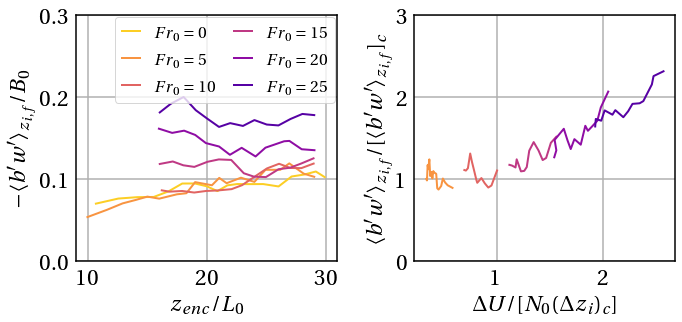

In [13]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.grid(True,linewidth=1.5)
ax2.grid(True,linewidth=1.5)
ax1.tick_params(bottom=False,left=False)
ax2.tick_params(bottom=False,left=False)
ax1.set_ylim(0,0.3)
ax2.set_ylim(0,3)
ax1.plot(S0.z_enc[1:-1]/L0,-runningmean(S0_s1_flux_zif,1)/B0,c=colors[0],label=r'$Fr_0=0$')
ax1.plot(S05.z_enc[1:-1]/L0,-runningmean(S05_s1_flux_zif,1)/B0,c=colors[1],label=r'$Fr_0=5$')
ax1.plot(S10.z_enc[1:-1]/L0,-runningmean(S10_s1_flux_zif,1)/B0,c=colors[2],label=r'$Fr_0=10$')
ax1.plot(S15.z_enc[1:-1]/L0,-runningmean(S15_s1_flux_zif,1)/B0,c=colors[3],label=r'$Fr_0=15$')
ax1.plot(time[1:-1],-runningmean(S20_s1_flux_zif,1)/B0,c=colors[4],label=r'$Fr_0=20$')
ax1.plot(S25.z_enc[1:-1]/L0,-runningmean(S25_s1_flux_zif,1)/B0,c=colors[5],label=r'$Fr_0=25$')
ax2.plot(S05.DeltaU[2:-1]/(N*0.25*S05.z_enc[2:-1]),runningmean(np.array(S05_s1_flux_zif[1:])/np.array(S0_s1_flux_zif),1),c=colors[1],label=r'$Fr_0=5$')
ax2.plot(S10.DeltaU[1:-1]/(N*0.25*S10.z_enc[1:-1]),runningmean(np.array(S10_s1_flux_zif)/np.array(S0_s1_flux_zif[3:-1]),1),c=colors[2],label=r'$Fr_0=10$')
ax2.plot(S15.DeltaU[1:-1]/(N*0.25*S15.z_enc[1:-1]),runningmean(np.array(S15_s1_flux_zif)/np.array(S0_s1_flux_zif[3:-1]),1),c=colors[3],label=r'$Fr_0=15$')
ax2.plot(Delta_U[1:-1]/(N*0.25*z_enc[1:-1]),runningmean(np.array(S20_s1_flux_zif)/np.array(S0_s1_flux_zif[3:-1]),1),c=colors[4],label=r'$Fr_0=20$')
ax2.plot(S25.DeltaU[1:-1]/(N*0.25*S25.z_enc[1:-1]),runningmean(np.array(S25_s1_flux_zif)/np.array(S0_s1_flux_zif[3:-1]),1),c=colors[5],label=r'$Fr_0=25$')
ax1.set_xlabel(r'$z_{enc}/L_0$')
ax1.set_ylabel(r'$-\langle b^\prime w^\prime \rangle_{z_{i,f}} /B_0$')
ax2.set_xlabel(r'$\Delta U/[N_0(\Delta z_i)_c]$')
ax2.set_ylabel(r'$\langle b^\prime w^\prime \rangle_{z_{i,f}}/[\langle b^\prime w^\prime \rangle_{z_{i,f}}]_c$')
ax1.legend(loc='best',handlelength=1,ncol=2,columnspacing=1,fontsize=18,borderaxespad=0.1)
plt.tight_layout()
plt.savefig(opath+'s1_vflux_total_DeltaU.pdf')
plt.show()

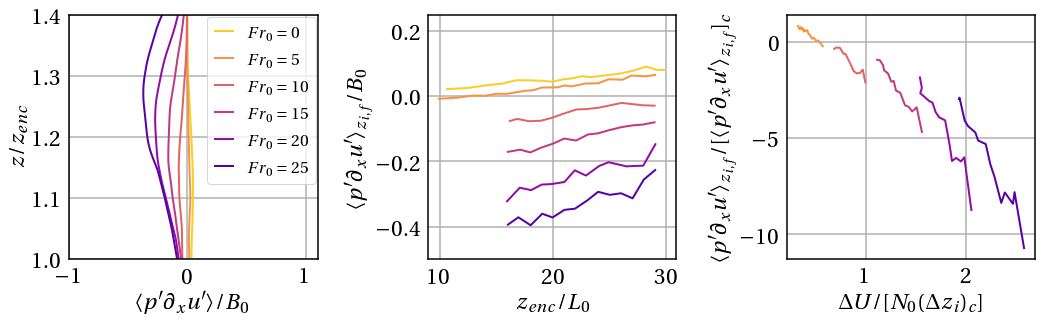

In [18]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
ax1.grid(True,linewidth=1.5)
ax2.grid(True,linewidth=1.5)
ax3.grid(True,linewidth=1.5)
ax1.tick_params(bottom=False,left=False)
ax2.tick_params(bottom=False,left=False)
ax3.tick_params(bottom=False,left=False)
ax1.set_ylim(1,1.4)
ax1.set_xlim(-1,1.1)
ax2.set_ylim(-0.5,0.25)
ax1.plot(0.5*np.mean(S0.Pixx[7:10,:],axis=0)/B0,S0.y/np.mean(S0.z_enc[7:10]),c=colors[0],label=r'$Fr_0=0$')
ax1.plot(0.5*np.mean(S05.Pixx[9:12,:],axis=0)/B0,S05.y/np.mean(S05.z_enc[9:12]),c=colors[1],label=r'$Fr_0=5$')
ax1.plot(0.5*np.mean(S10.Pixx[4:7,:],axis=0)/B0,S10.y/np.mean(S10.z_enc[4:7]),c=colors[2],label=r'$Fr_0=10$')
ax1.plot(0.5*np.mean(S15.Pixx[4:7,:],axis=0)/B0,S15.y/np.mean(S15.z_enc[4:7]),c=colors[3],label=r'$Fr_0=15$')
ax1.plot(0.5*np.mean(S20_1.Pixx[4:,:],axis=0)/B0,S20_1.y/np.mean(S20_1.z_enc[4:]),c=colors[4],label=r'$Fr_0=20$')
ax1.plot(0.5*np.mean(S25.Pixx[4:7,:],axis=0)/B0,S25.y/np.mean(S25.z_enc[4:7]),c=colors[5],label=r'$Fr_0=25$')
ax2.plot(S0.z_enc[1:-1]/L0,0.5*runningmean(S0_Pixx_zif,1)/B0,c=colors[0],label=r'$Fr_0=0$')
ax2.plot(S05.z_enc[1:-1]/L0,0.5*runningmean(S05_Pixx_zif,1)/B0,c=colors[1],label=r'$Fr_0=5$')
ax2.plot(S10.z_enc[1:-1]/L0,0.5*runningmean(S10_Pixx_zif,1)/B0,c=colors[2],label=r'$Fr_0=10$')
ax2.plot(S15.z_enc[1:-1]/L0,0.5*runningmean(S15_Pixx_zif,1)/B0,c=colors[3],label=r'$Fr_0=15$')
ax2.plot(time[1:-1],0.5*runningmean(S20_Pixx_zif,1)/B0,c=colors[4],label=r'$Fr_0=20$')
ax2.plot(S25.z_enc[1:-1]/L0,0.5*runningmean(S25_Pixx_zif,1)/B0,c=colors[5],label=r'$Fr_0=25$')
ax3.plot(S05.DeltaU[2:-1]/(N*0.25*S05.z_enc[2:-1]),runningmean(np.array(S05_Pixx_zif[1:])/np.array(S0_Pixx_zif),1),c=colors[1],label=r'$Fr_0=5$')
ax3.plot(S10.DeltaU[1:-1]/(N*0.25*S10.z_enc[1:-1]),runningmean(np.array(S10_Pixx_zif)/np.array(S0_Pixx_zif[3:-1]),1),c=colors[2],label=r'$Fr_0=10$')
ax3.plot(S15.DeltaU[1:-1]/(N*0.25*S15.z_enc[1:-1]),runningmean(np.array(S15_Pixx_zif)/np.array(S0_Pixx_zif[3:-1]),1),c=colors[3],label=r'$Fr_0=15$')
ax3.plot(Delta_U[1:-1]/(N*0.25*z_enc[1:-1]),runningmean(np.array(S20_Pixx_zif)/np.array(S0_Pixx_zif[3:-1]),1),c=colors[4],label=r'$Fr_0=20$')
ax3.plot(S25.DeltaU[1:-1]/(N*0.25*S25.z_enc[1:-1]),runningmean(np.array(S25_Pixx_zif)/np.array(S0_Pixx_zif[3:-1]),1),c=colors[5],label=r'$Fr_0=25$')
ax1.set_xlabel(r'$\langle p^\prime \partial_x u^\prime \rangle /B_0$')
ax1.set_ylabel(r'$z/z_{enc}$')
ax2.set_xlabel(r'$z_{enc}/L_0$')
ax2.set_ylabel(r'$\langle p^\prime \partial_x u^\prime \rangle_{z_{i,f}} /B_0$')
ax3.set_xlabel(r'$\Delta U/[N_0(\Delta z_i)_c]$')
ax3.set_ylabel(r'$\langle p^\prime \partial_x u^\prime \rangle_{z_{i,f}}/[\langle p^\prime \partial_x u^\prime \rangle_{z_{i,f}}]_c$')
ax1.legend(loc='best',handlelength=1,ncol=1,fontsize=18,borderaxespad=0.1)
plt.tight_layout()
plt.savefig(opath+'pressure_strain_Pixx.pdf')
plt.show()

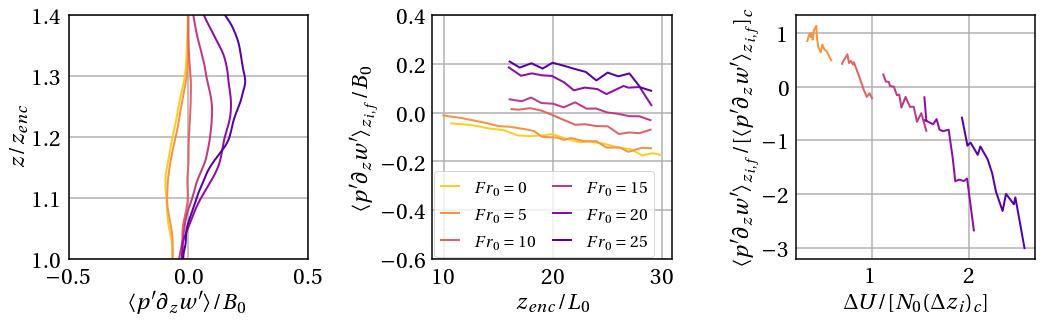

In [22]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
ax1.grid(True,linewidth=1.5)
ax2.grid(True,linewidth=1.5)
ax3.grid(True,linewidth=1.5)
ax1.tick_params(bottom=False,left=False)
ax2.tick_params(bottom=False,left=False)
ax3.tick_params(bottom=False,left=False)
ax1.set_ylim(1,1.4)
ax1.set_xlim(-0.5,0.5)
ax2.set_ylim(-0.6,0.4)
ax1.plot(0.5*np.mean(S0.Piyy[7:10,:]/B0,axis=0),S0.y/np.mean(S0.z_enc[7:10]),c=colors[0])
ax1.plot(0.5*np.mean(S05.Piyy[9:12,:]/B0,axis=0),S05.y/np.mean(S05.z_enc[9:12]),c=colors[1])
ax1.plot(0.5*np.mean(S10.Piyy[4:7,:]/B0,axis=0),S10.y/np.mean(S10.z_enc[4:7]),c=colors[2])
ax1.plot(0.5*np.mean(S15.Piyy[4:7,:]/B0,axis=0),S15.y/np.mean(S15.z_enc[4:7]),c=colors[3])
ax1.plot(0.5*np.mean(S20_1.Piyy[4:,:]/B0,axis=0),S20_1.y/np.mean(S20_1.z_enc[4:]),c=colors[4])
ax1.plot(0.5*np.mean(S25.Piyy[4:7,:]/B0,axis=0),S25.y/np.mean(S25.z_enc[4:7]),c=colors[5])
ax2.plot(S0.z_enc[1:-1]/L0,0.5*runningmean(S0_Piyy_zif,1)/B0,c=colors[0],label=r'$Fr_0=0$')
ax2.plot(S05.z_enc[1:-1]/L0,0.5*runningmean(S05_Piyy_zif,1)/B0,c=colors[1],label=r'$Fr_0=5$')
ax2.plot(S10.z_enc[1:-1]/L0,0.5*runningmean(S10_Piyy_zif,1)/B0,c=colors[2],label=r'$Fr_0=10$')
ax2.plot(S15.z_enc[1:-1]/L0,0.5*runningmean(S15_Piyy_zif,1)/B0,c=colors[3],label=r'$Fr_0=15$')
ax2.plot(time[1:-1],0.5*runningmean(S20_Piyy_zif,1)/B0,c=colors[4],label=r'$Fr_0=20$')
ax2.plot(S25.z_enc[1:-1]/L0,0.5*runningmean(S25_Piyy_zif,1)/B0,c=colors[5],label=r'$Fr_0=25$')
ax3.plot(S05.DeltaU[2:-1]/(N*0.25*S05.z_enc[2:-1]),runningmean(np.array(S05_Piyy_zif[1:])/np.array(S0_Piyy_zif),1),c=colors[1],label=r'$Fr_0=5$')
ax3.plot(S10.DeltaU[1:-1]/(N*0.25*S10.z_enc[1:-1]),runningmean(np.array(S10_Piyy_zif)/np.array(S0_Piyy_zif[3:-1]),1),c=colors[2],label=r'$Fr_0=10$')
ax3.plot(S15.DeltaU[1:-1]/(N*0.25*S15.z_enc[1:-1]),runningmean(np.array(S15_Piyy_zif)/np.array(S0_Piyy_zif[3:-1]),1),c=colors[3],label=r'$Fr_0=15$')
ax3.plot(Delta_U[1:-1]/(N*0.25*z_enc[1:-1]),runningmean(np.array(S20_Piyy_zif)/np.array(S0_Piyy_zif[3:-1]),1),c=colors[4],label=r'$Fr_0=20$')
ax3.plot(S25.DeltaU[1:-1]/(N*0.25*S25.z_enc[1:-1]),runningmean(np.array(S25_Piyy_zif)/np.array(S0_Piyy_zif[3:-1]),1),c=colors[5],label=r'$Fr_0=25$')
ax1.set_xlabel(r'$\langle p^\prime \partial_z w^\prime \rangle /B_0$')
ax1.set_ylabel(r'$z/z_{enc}$')
ax2.set_xlabel(r'$z_{enc}/L_0$')
ax2.set_ylabel(r'$\langle p^\prime \partial_z w^\prime \rangle_{z_{i,f}} /B_0$')
ax3.set_xlabel(r'$\Delta U/[N_0(\Delta z_i)_c]$')
ax3.set_ylabel(r'$\langle p^\prime \partial_z w^\prime \rangle_{z_{i,f}}/[\langle p^\prime \partial_z w^\prime \rangle_{z_{i,f}}]_c$')
ax2.legend(loc='best',handlelength=1,ncol=2,columnspacing=1,fontsize=18,borderaxespad=0.1)
plt.tight_layout()
plt.savefig(opath+'pressure_strain_Piyy.pdf')
plt.show()

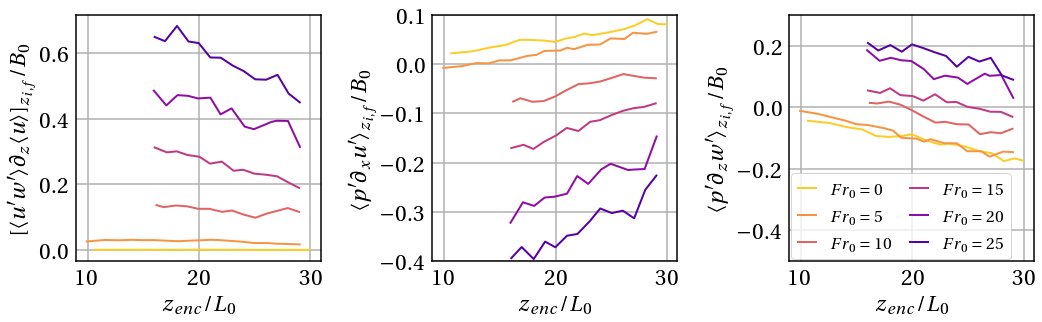

In [12]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
ax1.grid(True,linewidth=1.5)
ax2.grid(True,linewidth=1.5)
ax3.grid(True,linewidth=1.5)
ax1.tick_params(bottom=False,left=False)
ax2.tick_params(bottom=False,left=False)
ax3.tick_params(bottom=False,left=False)
ax2.set_ylim(-0.4,0.1)
ax3.set_ylim(-0.5,0.3)
ax2.plot(S0.z_enc[1:-1]/L0,0.5*runningmean(S0_Pixx_zif,1)/B0,c=colors[0],label=r'$Fr_0=0$')
ax2.plot(S05.z_enc[1:-1]/L0,0.5*runningmean(S05_Pixx_zif,1)/B0,c=colors[1],label=r'$Fr_0=5$')
ax2.plot(S10.z_enc[1:-1]/L0,0.5*runningmean(S10_Pixx_zif,1)/B0,c=colors[2],label=r'$Fr_0=10$')
ax2.plot(S15.z_enc[1:-1]/L0,0.5*runningmean(S15_Pixx_zif,1)/B0,c=colors[3],label=r'$Fr_0=15$')
ax2.plot(time[1:-1],0.5*runningmean(S20_Pixx_zif,1)/B0,c=colors[4],label=r'$Fr_0=20$')
ax2.plot(S25.z_enc[1:-1]/L0,0.5*runningmean(S25_Pixx_zif,1)/B0,c=colors[5],label=r'$Fr_0=25$')
ax3.plot(S0.z_enc[1:-1]/L0,0.5*runningmean(S0_Piyy_zif,1)/B0,c=colors[0],label=r'$Fr_0=0$')
ax3.plot(S05.z_enc[1:-1]/L0,0.5*runningmean(S05_Piyy_zif,1)/B0,c=colors[1],label=r'$Fr_0=5$')
ax3.plot(S10.z_enc[1:-1]/L0,0.5*runningmean(S10_Piyy_zif,1)/B0,c=colors[2],label=r'$Fr_0=10$')
ax3.plot(S15.z_enc[1:-1]/L0,0.5*runningmean(S15_Piyy_zif,1)/B0,c=colors[3],label=r'$Fr_0=15$')
ax3.plot(time[1:-1],0.5*runningmean(S20_Piyy_zif,1)/B0,c=colors[4],label=r'$Fr_0=20$')
ax3.plot(S25.z_enc[1:-1]/L0,0.5*runningmean(S25_Piyy_zif,1)/B0,c=colors[5],label=r'$Fr_0=25$')
ax1.plot(S0.z_enc[1:-1]/L0,runningmean(S0_Prd_zif,1)/B0,c=colors[0],label=r'$Fr_0=0$')
ax1.plot(S05.z_enc[1:-1]/L0,runningmean(S05_Prd_zif,1)/B0,c=colors[1],label=r'$Fr_0=5$')
ax1.plot(S10.z_enc[1:-1]/L0,runningmean(S10_Prd_zif,1)/B0,c=colors[2],label=r'$Fr_0=10$')
ax1.plot(S15.z_enc[1:-1]/L0,runningmean(S15_Prd_zif,1)/B0,c=colors[3],label=r'$Fr_0=15$')
ax1.plot(time[1:-1],runningmean(S20_Prd_zif,1)/B0,c=colors[4],label=r'$Fr_0=20$')
ax1.plot(S25.z_enc[1:-1]/L0,runningmean(S25_Prd_zif,1)/B0,c=colors[5],label=r'$Fr_0=25$')
ax2.set_xlabel(r'$z_{enc}/L_0$')
ax2.set_ylabel(r'$\langle p^\prime \partial_x u^\prime \rangle_{z_{i,f}} /B_0$')
ax3.set_xlabel(r'$z_{enc}/L_0$')
ax3.set_ylabel(r'$\langle p^\prime \partial_z w^\prime \rangle_{z_{i,f}} /B_0$')
ax1.set_xlabel(r'$z_{enc}/L_0$')
ax1.set_ylabel(r'$[\langle u^\prime w^\prime \rangle \partial_z \langle u \rangle]_{z_{i,f}} /B_0$')
ax3.legend(loc='best',handlelength=1,ncol=2,columnspacing=1,fontsize=18,borderaxespad=0.1)
plt.tight_layout()
plt.savefig(opath+'pressure_strain_shear_production.pdf')
plt.show()

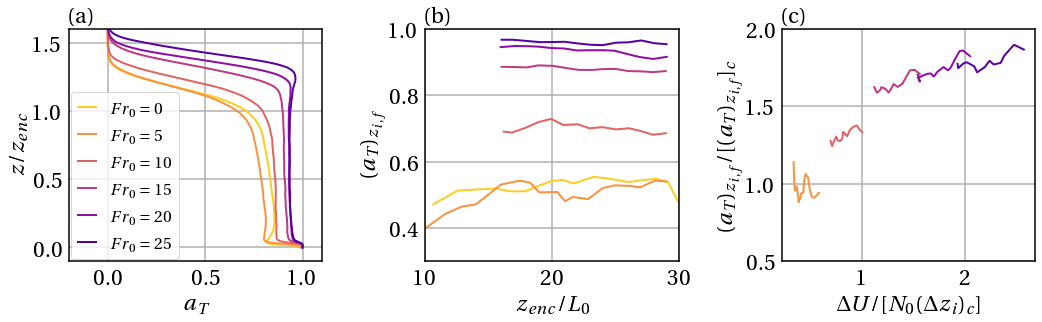

In [13]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
ax1.grid(True,linewidth=1.5)
ax2.grid(True,linewidth=1.5)
ax3.grid(True,linewidth=1.5)
ax1.tick_params(bottom=False,left=False)
ax2.tick_params(bottom=False,left=False)
ax3.tick_params(bottom=False,left=False)
ax1.set_xlim(-0.2,1.1)
ax1.set_ylim(-0.1,1.6)
ax2.set_ylim(0.3,1)
ax2.set_xlim(10,30)
ax2.set_ylim(0.3,1)
ax3.set_ylim(0.5,2)
ax1.plot(np.mean(S0_vort_int.int2[7:10,:],axis=0),S0.y/np.mean(S0.z_enc[7:10]),c=colors[0],label=r'$Fr_0=0$')
ax1.plot(np.mean(S05_vort_int.int2[9:12,:],axis=0),S05.y/np.mean(S05.z_enc[9:12]),c=colors[1],label=r'$Fr_0=5$')
ax1.plot(np.mean(S10_vort_int.int2[4:7,:],axis=0),S10.y/np.mean(S10.z_enc[4:7]),c=colors[2],label=r'$Fr_0=10$')
ax1.plot(np.mean(S15_vort_int.int2[4:7,:],axis=0),S15.y/np.mean(S15.z_enc[4:7]),c=colors[3],label=r'$Fr_0=15$')
ax1.plot(np.mean(S20_vort_int_1.int2[4:,:],axis=0),S20_1.y/np.mean(S20_1.z_enc[4:]),c=colors[4],label=r'$Fr_0=20$')
ax1.plot(np.mean(S25_vort_int.int2[4:7,:],axis=0),S25.y/np.mean(S25.z_enc[4:7]),c=colors[5],label=r'$Fr_0=25$')
ax2.plot(S0.z_enc[1:-1]/L0,runningmean(S0_vort_turbareafrac_zif,1),c=colors[0])
ax2.plot(S05.z_enc[1:-1]/L0,runningmean(S05_vort_turbareafrac_zif,1),c=colors[1])
ax2.plot(S10.z_enc[1:-1]/L0,runningmean(S10_vort_turbareafrac_zif,1),c=colors[2])
ax2.plot(S15.z_enc[1:-1]/L0,runningmean(S15_vort_turbareafrac_zif,1),c=colors[3])
ax2.plot(time[1:-1],runningmean(S20_vort_turbareafrac_zif,1),c=colors[4])
ax2.plot(S25.z_enc[1:-1]/L0,runningmean(S25_vort_turbareafrac_zif,1),c=colors[5])
ax3.plot(S05.DeltaU[2:-1]/(N*0.25*S05.z_enc[2:-1]),runningmean(np.array(S05_vort_turbareafrac_zif[1:])/np.array(S0_vort_turbareafrac_zif),1),c=colors[1])
ax3.plot(S10.DeltaU[1:-1]/(N*0.25*S10.z_enc[1:-1]),runningmean(np.array(S10_vort_turbareafrac_zif)/np.array(S0_vort_turbareafrac_zif[3:-1]),1),c=colors[2])
ax3.plot(S15.DeltaU[1:-1]/(N*0.25*S15.z_enc[1:-1]),runningmean(np.array(S15_vort_turbareafrac_zif)/np.array(S0_vort_turbareafrac_zif[3:-1]),1),c=colors[3])
ax3.plot(Delta_U[1:-1]/(N*0.25*z_enc[1:-1]),runningmean(np.array(S20_vort_turbareafrac_zif)/np.array(S0_vort_turbareafrac_zif[3:-1]),1),c=colors[4])
ax3.plot(S25.DeltaU[1:-1]/(N*0.25*S25.z_enc[1:-1]),runningmean(np.array(S25_vort_turbareafrac_zif)/np.array(S0_vort_turbareafrac_zif[3:-1]),1),c=colors[5])
ax1.set_xlabel(r'$a_T$')
ax1.set_ylabel(r'$z/z_{enc}$')
ax1.set_title(r'(a)',fontsize=24,loc='left')
ax2.set_xlabel(r'$z_{enc}/L_0$')
ax2.set_ylabel(r'$(a_T)_{z_{i,f}}$')
ax2.set_title(r'(b)',fontsize=24,loc='left')
ax3.set_xlabel(r'$\Delta U/[N_0(\Delta z_i)_c]$')
ax3.set_ylabel(r'$(a_T)_{z_{i,f}}/[(a_T)_{z_{i,f}}]_c$')
ax3.set_title(r'(c)',fontsize=24,loc='left')
ax1.legend(loc='lower left',fontsize=18,handlelength=1,borderaxespad=0.1)
plt.tight_layout()
plt.savefig(opath+'turb_area_frac_mean.pdf',bbox_inches='tight')
plt.show()

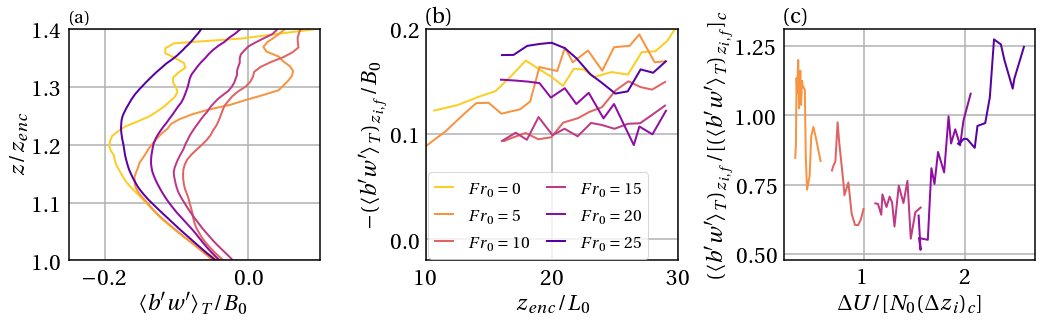

In [14]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
ax1.grid(True,linewidth=1.5)
ax2.grid(True,linewidth=1.5)
ax3.grid(True,linewidth=1.5)
ax1.tick_params(bottom=False,left=False)
ax2.tick_params(bottom=False,left=False)
ax3.tick_params(bottom=False,left=False)
ax1.set_xlim(-0.25,0.1)
ax1.set_ylim(1,1.4)
ax2.set_xlim(10,30)
ax2.set_ylim(-0.02,0.2)
ax1.plot(np.mean(S0_vort_int.P2v1[7:10,:]-S0_vort_int.P2S1Mom1[7:10,:]*S0_vort_int.P2VMom1[7:10,:],axis=0)/B0,S0.y/np.mean(S0.z_enc[7:10]),c=colors[0])
ax1.plot(np.mean(S05_vort_int.P2v1[9:12,:]-S05_vort_int.P2S1Mom1[9:12,:]*S05_vort_int.P2VMom1[9:12,:],axis=0)/B0,S05.y/np.mean(S05.z_enc[9:12]),c=colors[1])
ax1.plot(np.mean(S10_vort_int.P2v1[4:7,:]-S10_vort_int.P2S1Mom1[4:7,:]*S10_vort_int.P2VMom1[4:7,:],axis=0)/B0,S10.y/np.mean(S10.z_enc[4:7]),c=colors[2])
ax1.plot(np.mean(S15_vort_int.P2v1[4:7,:]-S15_vort_int.P2S1Mom1[4:7,:]*S15_vort_int.P2VMom1[4:7,:],axis=0)/B0,S15.y/np.mean(S15.z_enc[4:7]),c=colors[3])
ax1.plot(np.mean(S20_vort_int_1.P2v1[4:,:]-S20_vort_int_1.P2S1Mom1[4:,:]*S20_vort_int_1.P2VMom1[4:,:],axis=0)/B0,S20_1.y/np.mean(S20_1.z_enc[4:]),c=colors[4])
ax1.plot(np.mean(S25_vort_int.P2v1[4:7,:]-S25_vort_int.P2S1Mom1[4:7,:]*S25_vort_int.P2VMom1[4:7,:],axis=0)/B0,S25.y/np.mean(S25.z_enc[4:7]),c=colors[5])
ax2.plot(S0.z_enc[1:-1]/L0,-runningmean(np.array(S0_vort_p2_v1_zif)-np.array(S0_vort_p2_s1_mean_zif)*np.array(S0_vort_p2_w_mean_zif),1)/B0,c=colors[0],label=r'$Fr_0=0$')
ax2.plot(S05.z_enc[1:-1]/L0,-runningmean(np.array(S05_vort_p2_v1_zif)-np.array(S05_vort_p2_s1_mean_zif)*np.array(S05_vort_p2_w_mean_zif),1)/B0,c=colors[1],label=r'$Fr_0=5$')
ax2.plot(S10.z_enc[1:-1]/L0,-runningmean(np.array(S10_vort_p2_v1_zif)-np.array(S10_vort_p2_s1_mean_zif)*np.array(S10_vort_p2_w_mean_zif),1)/B0,c=colors[2],label=r'$Fr_0=10$')
ax2.plot(S15.z_enc[1:-1]/L0,-runningmean(np.array(S15_vort_p2_v1_zif)-np.array(S15_vort_p2_s1_mean_zif)*np.array(S15_vort_p2_w_mean_zif),1)/B0,c=colors[3],label=r'$Fr_0=15$')
ax2.plot(time[1:-1],-runningmean(np.array(S20_vort_p2_v1_zif)-np.array(S20_vort_p2_s1_mean_zif)*np.array(S20_vort_p2_w_mean_zif),1)/B0,c=colors[4],label=r'$Fr_0=20$')
ax2.plot(S25.z_enc[1:-1]/L0,-runningmean(np.array(S25_vort_p2_v1_zif)-np.array(S25_vort_p2_s1_mean_zif)*np.array(S25_vort_p2_w_mean_zif),1)/B0,c=colors[5],label=r'$Fr_0=25$')
ax3.plot(S05.DeltaU[2:-1]/(N*0.25*S05.z_enc[2:-1]),runningmean((np.array(S05_vort_p2_v1_zif[1:])-np.array(S05_vort_p2_s1_mean_zif[1:])*np.array(S05_vort_p2_w_mean_zif[1:]))/(np.array(S0_vort_p2_v1_zif)-np.array(S0_vort_p2_s1_mean_zif)*np.array(S0_vort_p2_w_mean_zif)),1),c=colors[1])
ax3.plot(S10.DeltaU[1:-1]/(N*0.25*S10.z_enc[1:-1]),runningmean((np.array(S10_vort_p2_v1_zif)-np.array(S10_vort_p2_s1_mean_zif)*np.array(S10_vort_p2_w_mean_zif))/(np.array(S0_vort_p2_v1_zif[3:-1])-np.array(S0_vort_p2_s1_mean_zif[3:-1])*np.array(S0_vort_p2_w_mean_zif[3:-1])),1),c=colors[2])
ax3.plot(S15.DeltaU[1:-1]/(N*0.25*S15.z_enc[1:-1]),runningmean((np.array(S15_vort_p2_v1_zif)-np.array(S15_vort_p2_s1_mean_zif)*np.array(S15_vort_p2_w_mean_zif))/(np.array(S0_vort_p2_v1_zif[3:-1])-np.array(S0_vort_p2_s1_mean_zif[3:-1])*np.array(S0_vort_p2_w_mean_zif[3:-1])),1),c=colors[3])
ax3.plot(Delta_U[1:-1]/(N*0.25*z_enc[1:-1]),runningmean((np.array(S20_vort_p2_v1_zif)-np.array(S20_vort_p2_s1_mean_zif)*np.array(S20_vort_p2_w_mean_zif))/(np.array(S0_vort_p2_v1_zif[3:-1])-np.array(S0_vort_p2_s1_mean_zif[3:-1])*np.array(S0_vort_p2_w_mean_zif[3:-1])),1),c=colors[4])
ax3.plot(S25.DeltaU[1:-1]/(N*0.25*S25.z_enc[1:-1]),runningmean((np.array(S25_vort_p2_v1_zif)-np.array(S25_vort_p2_s1_mean_zif)*np.array(S25_vort_p2_w_mean_zif))/(np.array(S0_vort_p2_v1_zif[3:-1])-np.array(S0_vort_p2_s1_mean_zif[3:-1])*np.array(S0_vort_p2_w_mean_zif[3:-1])),1),c=colors[5])
ax1.set_xlabel(r'$\langle b^\prime w^\prime \rangle_T /B_0$')
ax1.set_ylabel(r'$z/z_{enc}$')
ax1.set_title('(a)',fontsize=20,loc='left')
ax2.set_xlabel(r'$z_{enc}/L_0$')
ax2.set_ylabel(r'$-(\langle b^\prime w^\prime \rangle_T)_{z_{i,f}} /B_0$')
ax2.set_title('(b)',fontsize=24,loc='left')
ax2.legend(loc='best',fontsize=18,handlelength=1,borderaxespad=0.1,ncol=2,columnspacing=1)
ax3.set_xlabel(r'$\Delta U/[N_0(\Delta z_i)_c]$')
ax3.set_ylabel(r'$(\langle b^\prime w^\prime\rangle_T)_{z_{i,f}}/[(\langle b^\prime w^\prime \rangle_T)_{z_{i,f}}]_c$')
ax3.set_title('(c)',fontsize=24,loc='left')
plt.tight_layout()
plt.savefig(opath+'s1_vflux_mean.pdf',bbox_inches='tight')
plt.show()

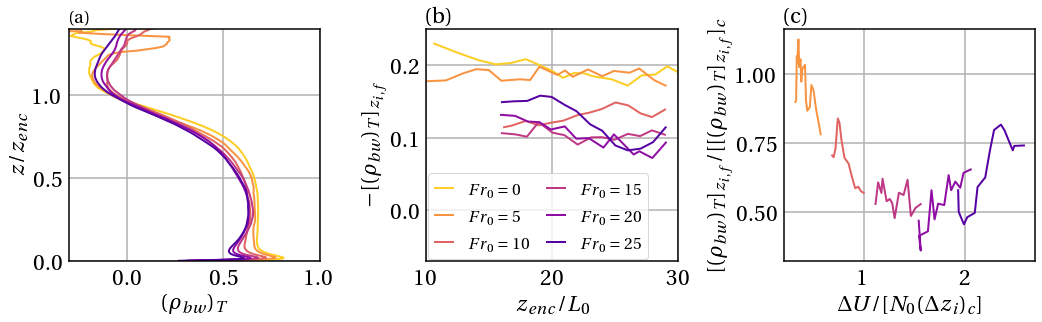

In [15]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
ax1.grid(True,linewidth=1.5)
ax2.grid(True,linewidth=1.5)
ax3.grid(True,linewidth=1.5)
ax1.tick_params(bottom=False,left=False)
ax2.tick_params(bottom=False,left=False)
ax3.tick_params(bottom=False,left=False)
ax1.set_ylim(0,1.4)
ax1.set_xlim(-0.3,1)
ax2.set_ylim(-0.07,0.25)
ax2.set_xlim(10,30)
#ax3.set_ylim(0.75,1.2)
ax1.plot(np.mean(rho_bw_turb_S0,axis=0),S0.y/np.mean(S0.z_enc[7:10]),c=colors[0])
ax1.plot(np.mean(rho_bw_turb_S05,axis=0),S05.y/np.mean(S05.z_enc[9:12]),c=colors[1])
ax1.plot(np.mean(rho_bw_turb_S10,axis=0),S10.y/np.mean(S10.z_enc[4:7]),c=colors[2])
ax1.plot(np.mean(rho_bw_turb_S15,axis=0),S15.y/np.mean(S15.z_enc[4:7]),c=colors[3])
ax1.plot(np.mean(rho_bw_S20_turb,axis=0),S20_1.y/np.mean(S20_1.z_enc[4:]),c=colors[4])
ax1.plot(np.mean(rho_bw_turb_S25,axis=0),S25.y/np.mean(S25.z_enc[4:7]),c=colors[5])
ax2.plot(S0.z_enc[1:-1]/L0,-runningmean(rho_bw_zif_S0_turb,1),c=colors[0],label=r'$Fr_0=0$')
ax2.plot(S05.z_enc[1:-1]/L0,-runningmean(rho_bw_zif_S05_turb,1),c=colors[1],label=r'$Fr_0=5$')
ax2.plot(S10.z_enc[1:-1]/L0,-runningmean(rho_bw_zif_S10_turb,1),c=colors[2],label=r'$Fr_0=10$')
ax2.plot(S15.z_enc[1:-1]/L0,-runningmean(rho_bw_zif_S15_turb,1),c=colors[3],label=r'$Fr_0=15$')
ax2.plot(time[1:-1],-runningmean(rho_bw_zif_S20_turb,1),c=colors[4],label=r'$Fr_0=20$')
ax2.plot(S25.z_enc[1:-1]/L0,-runningmean(rho_bw_zif_S25_turb,1),c=colors[5],label=r'$Fr_0=25$')
ax3.plot(S05.DeltaU[2:-1]/(N*0.25*S05.z_enc[2:-1]),runningmean(rho_bw_zif_S05_turb[1:]/rho_bw_zif_S0_turb,1),c=colors[1])
ax3.plot(S10.DeltaU[1:-1]/(N*0.25*S10.z_enc[1:-1]),runningmean(rho_bw_zif_S10_turb/rho_bw_zif_S0_turb[3:-1],1),c=colors[2])
ax3.plot(S15.DeltaU[1:-1]/(N*0.25*S15.z_enc[1:-1]),runningmean(rho_bw_zif_S15_turb/rho_bw_zif_S0_turb[3:-1],1),c=colors[3])
ax3.plot(Delta_U[1:-1]/(N*0.25*z_enc[1:-1]),runningmean(rho_bw_zif_S20_turb/rho_bw_zif_S0_turb[3:-1],1),c=colors[4])
ax3.plot(S25.DeltaU[1:-1]/(N*0.25*S25.z_enc[1:-1]),runningmean(rho_bw_zif_S25_turb/rho_bw_zif_S0_turb[3:-1],1),c=colors[5])
ax1.set_xlabel(r'$(\rho_{bw})_T$')
ax1.set_ylabel(r'$z/z_{enc}$')
ax1.set_title('(a)',fontsize=20,loc='left')
ax2.set_xlabel(r'$z_{enc}/L_0$')
ax2.set_ylabel(r'$-[(\rho_{bw})_T]_{z_{i,f}}$')
ax2.set_title('(b)',fontsize=24,loc='left')
ax2.legend(loc='best',fontsize=18,handlelength=1,borderaxespad=0.1,ncol=2,columnspacing=1)
ax3.set_xlabel(r'$\Delta U/[N_0(\Delta z_i)_c]$')
ax3.set_ylabel(r'$[(\rho_{bw})_T]_{z_{i,f}}/[[(\rho_{bw})_T]_{z_{i,f}}]_c$')
ax3.set_title('(c)',fontsize=24,loc='left')
plt.tight_layout()
plt.savefig(opath+'rho_bw_mean.pdf',bbox_inches='tight')
plt.show()

In [30]:
print(S0.z_enc/L0)

[ 8.18083029 10.6300513  12.51903948 14.122678   15.50787844 16.76266979
 17.90861149 18.97411414 19.95629988 20.87524354 21.71752361 22.55014565
 23.30011006 24.73502528 26.02956703 27.12793448 28.21832172 29.17423538
 29.92004092 30.76027032]


In [31]:
print(S05.z_enc/L0)

[ 7.81620838  9.91655825 11.55980658 12.88166085 13.98244406 14.9687447
 15.97113242 17.45892289 18.26061228 18.99632934 20.41257793 21.02867573
 21.65164289 22.85882934 23.99408078 24.92861256 26.17403176 26.9359654
 28.15348867 29.03803378 29.81866691]


In [37]:
print(S10.z_enc/L0)

[15.01556411 16.18380874 16.82729968 17.90042865 18.91837038 19.93169269
 20.89803857 22.07030157 22.95532629 23.97291442 25.05457469 26.07486089
 27.03718061 27.9532553  28.98860493 30.06893023]


In [49]:
np.mean(S25.z_ig/S25.z_enc)

1.374063801167617